# Customer Segmentation Clustering

## About Dataset

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

## Data Dictionary

**ID**

* Numerical
* It is a unique identifier for each customer.

**Sex**

* Categorical
* 0: Male, 1: Female

**Maretial Status**

* Categorical
* 0: Single, 1: Non-Single (Married, Divorced, Separated, Widowed)

**Age**
* Numerical
* Age of customer in years.

**Education**
* Categorical
* 0: Other/unknown, 1: High School, 2: University, 3: Graduate school

**Income**
* Numerical
* Annual income in USD of the customer.

**Occupation**

* Categorical
* 0: Unemployed/Unskilled, 1: Skilled employee/Official, 2: Management/Self-employed/Highly qualified employee/Officer

**Settlement size**

* Categorical
* 0: small city, 1: Mid-sized city, 2: Big city

## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* Create a profile for different groups(or clusters) of customers those are frequent in a particular mall.

In [1]:
# Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

### Reading dataset and getting an idea what it contains

##### Read Dataset

In [2]:
import os
folderpath = "drive/MyDrive/Colab Notebooks/dscourse/data"
csvpath = os.path.join(folderpath, "segmentation data.csv")

In [3]:
df = pd.read_csv(csvpath)

In [4]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


##### Claening up column names for better handling

In [5]:
col_cleaned = []

for col in df.columns:
  new_col_name = col.lower().replace(' ', '_')
  col_cleaned.append(new_col_name)
df.columns = col_cleaned

In [6]:
# Sanity check
df.head()

,id,sex,marital_status,age,education,income,occupation,settlement_size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


##### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [7]:
df.isnull().sum()

id                 0
sex                0
marital_status     0
age                0
education          0
income             0
occupation         0
settlement_size    0
dtype: int64

### Observation

* No missing value present.

#### Duplicate Row Detection

Detecting duplicate rows and removing them is vital for ensuring quality of data, integrity, accuracy and performance.

In [8]:
print(f"Number of duplicate rows: {df[df.duplicated()].shape[0]}")

Number of duplicate rows: 0


#### Remove Unnecessary Columns

Removing unnecessary columns helps in reducing noise, optimizing resources and enhance quality and clarity of data.

Here ID column is not needed for EDA or modeling, so it should be removed.

In [9]:
df1 = df.drop("id", axis=True)

In [10]:
# Sanity check
df1.head()

,sex,marital_status,age,education,income,occupation,settlement_size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


#### Checking Data Types

By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2000 non-null   int64
 1   sex              2000 non-null   int64
 2   marital_status   2000 non-null   int64
 3   age              2000 non-null   int64
 4   education        2000 non-null   int64
 5   income           2000 non-null   int64
 6   occupation       2000 non-null   int64
 7   settlement_size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [12]:
# As all columns are showing numeric find further which are categorical and numerical by nature.
cat_columns = []
num_columns = []

# Find and create separate list for categorical and numeric columns
for col in df1.columns:
  if df1[col].nunique() > 10:
    # Set Numeric
    num_columns.append(col)
  else:
    # Set categorical
    cat_columns.append(col)
print(f"Number of numeric columns: {len(num_columns)}")
print(f"{num_columns}")
print('-' * 60)
print(f"Number of categorical columns: {len(cat_columns)}")
print(f"{cat_columns}")


Number of numeric columns: 2
['age', 'income']
------------------------------------------------------------
Number of categorical columns: 5
['sex', 'marital_status', 'education', 'occupation', 'settlement_size']


#### Distribution of Numeric Columns

Checking and visualizing the distribution of numeric columns is vital for understanding the underlying characteristics of the data such as central tendency, spread & variablity of data and also understand whether the data is symmetrically distributed or skewness is present in the data.

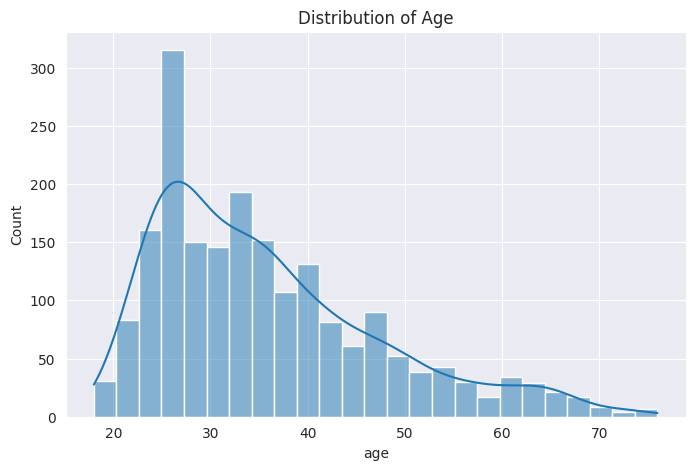

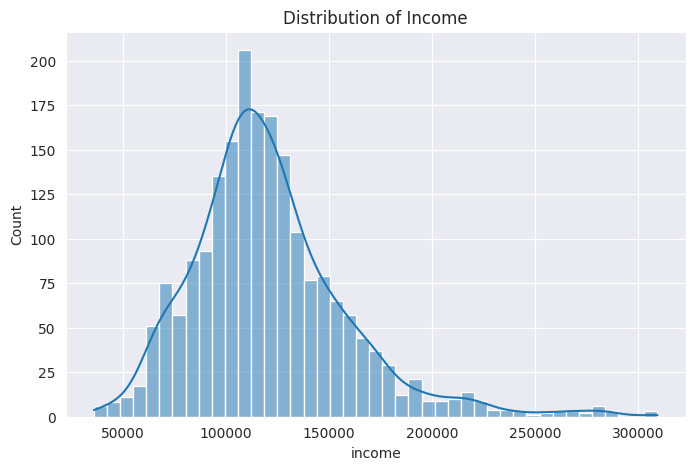

In [13]:
for col in num_columns:
  fig, axes = plt.subplots(figsize= (8,5))
  sns.histplot(data=df1, x= col, kde=True)
  axes.set_title(f"Distribution of {col.title()}")

#### Observations

* Age and income both are right skewed. Age is more skewed than income.

#### Overview of Categorical columns

It helps us to identify proportion of each category contributed to the sample.

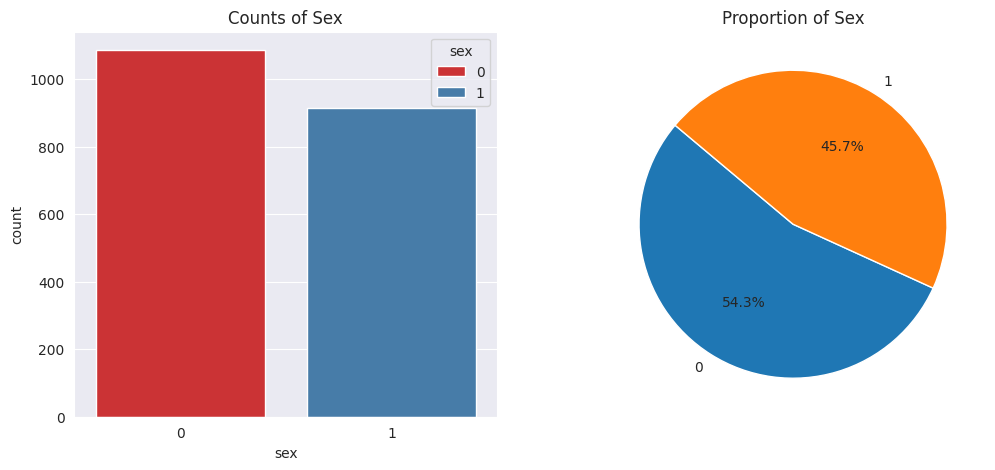

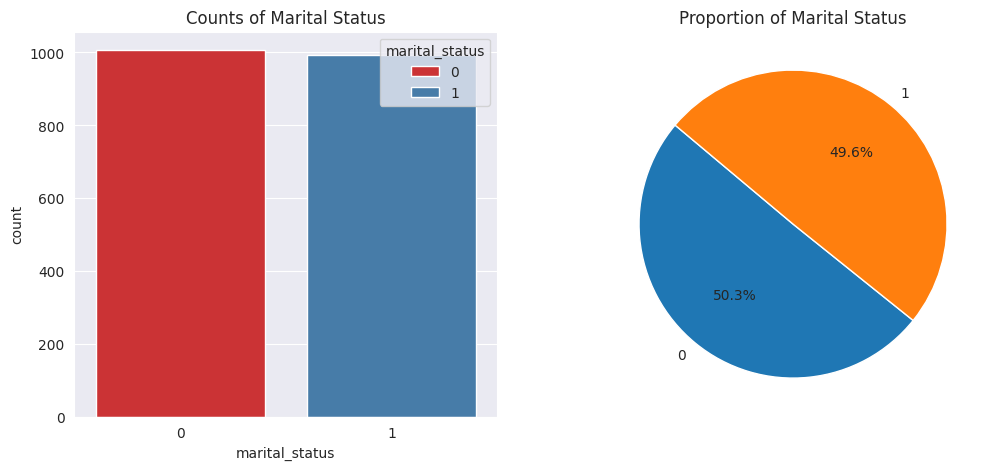

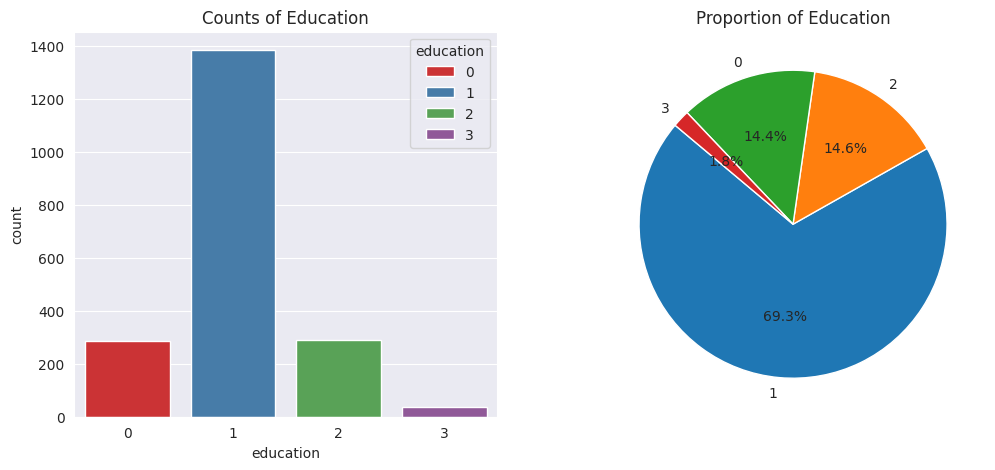

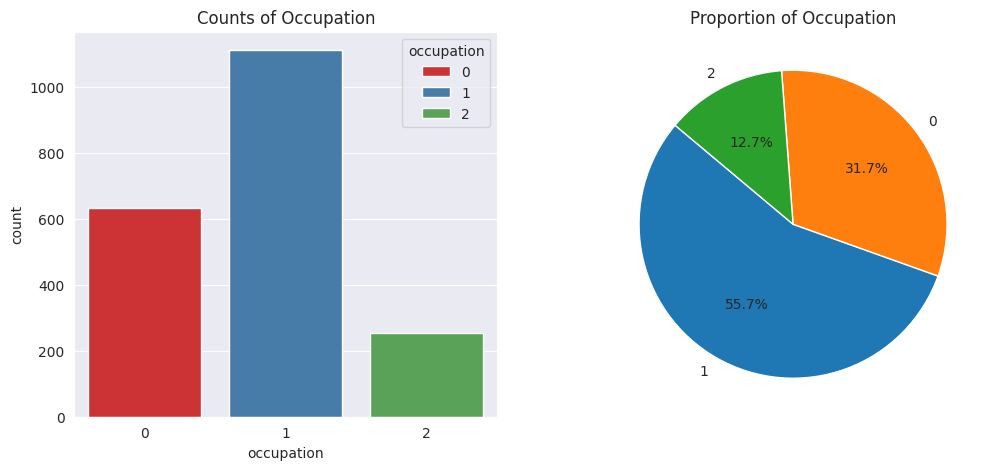

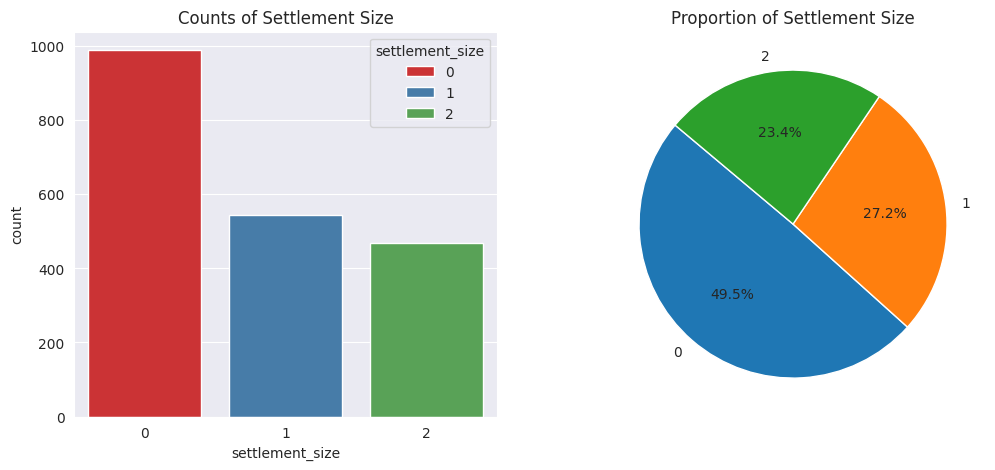

In [14]:
for col in cat_columns:
  fig, axes = plt.subplots(nrows= 1, ncols=2, figsize=(12, 5))
  # Count Plot
  sns.countplot(data=df1, x= col, ax= axes[0], hue=col, palette="Set1")
  axes[0].set_title(f"Counts of {col.replace('_', ' ').title()}")

  # Pie Plot
  plt.pie( x= df1[col].value_counts(), labels= df1[col].value_counts().index, autopct="%1.1f%%", startangle=140)
  axes[1].set_title(f"Proportion of {col.replace('_', ' ').title()}")

### Observations

* Nothing unexpected found. All are in good proportion.

## Clustering

#### Data Preparation

Scaling features ensure that all features contribute equally to the cluster formation, leading to more meaningful and accurate clusters.

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
scaled = sc.fit_transform(df1)

In [17]:
#Sanity check
scaled

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [18]:
# Put in DataFrame
df_scaled = pd.DataFrame(scaled, columns=df1.columns)

In [19]:
# Sanity check
df_scaled

,sex,marital_status,age,education,income,occupation,settlement_size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


In [20]:
df_scaled.describe()

,sex,marital_status,age,education,income,occupation,settlement_size
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000
mean,-1.421085e-16,5.684342e-17,9.059420e-17,-5.684342e-17,1.563194e-16,2.842171e-17,0.000000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250
min,-9.173988e-01,-9.930243e-01,-1.528532e+00,-1.731068e+00,-2.234225e+00,-1.269525e+00,-0.909730
25%,-9.173988e-01,-9.930243e-01,-7.603825e-01,-6.337243e-02,-6.113281e-01,-1.269525e+00,-0.909730
50%,-9.173988e-01,-9.930243e-01,-2.482829e-01,-6.337243e-02,-1.418903e-01,2.968230e-01,0.321298
75%,1.090038e+00,1.007025e+00,5.198664e-01,-6.337243e-02,4.492952e-01,2.968230e-01,0.321298
max,1.090038e+00,1.007025e+00,3.421764e+00,3.272018e+00,4.945225e+00,1.863171e+00,1.552326


#### Dendogram Representation

Dendrogram representation is necessary for visualizing hierarchical clustering results, determining the optimal number of clusters.

In [21]:
import scipy.cluster.hierarchy as sch

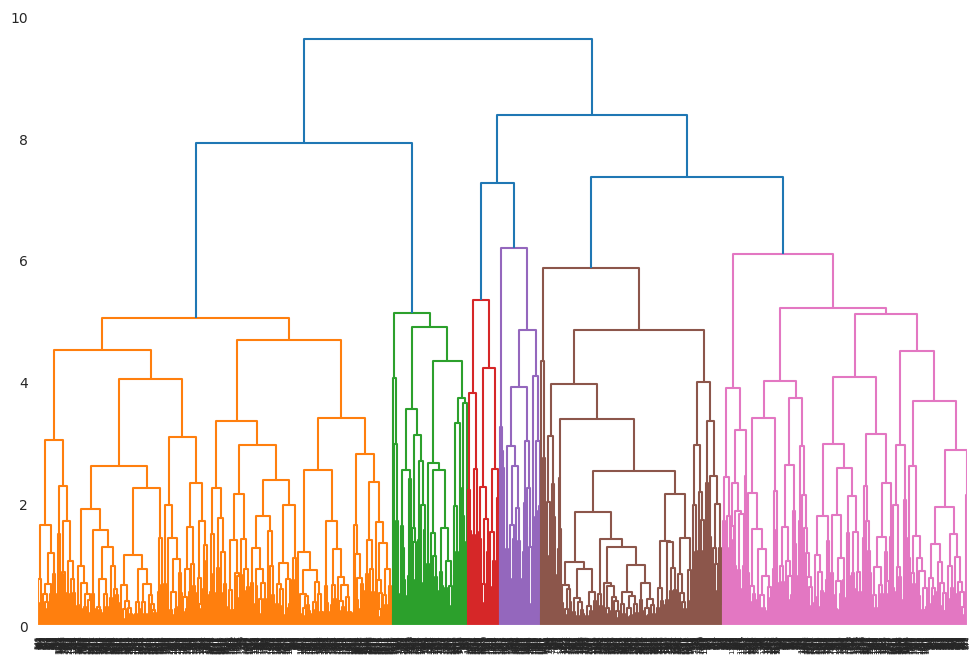

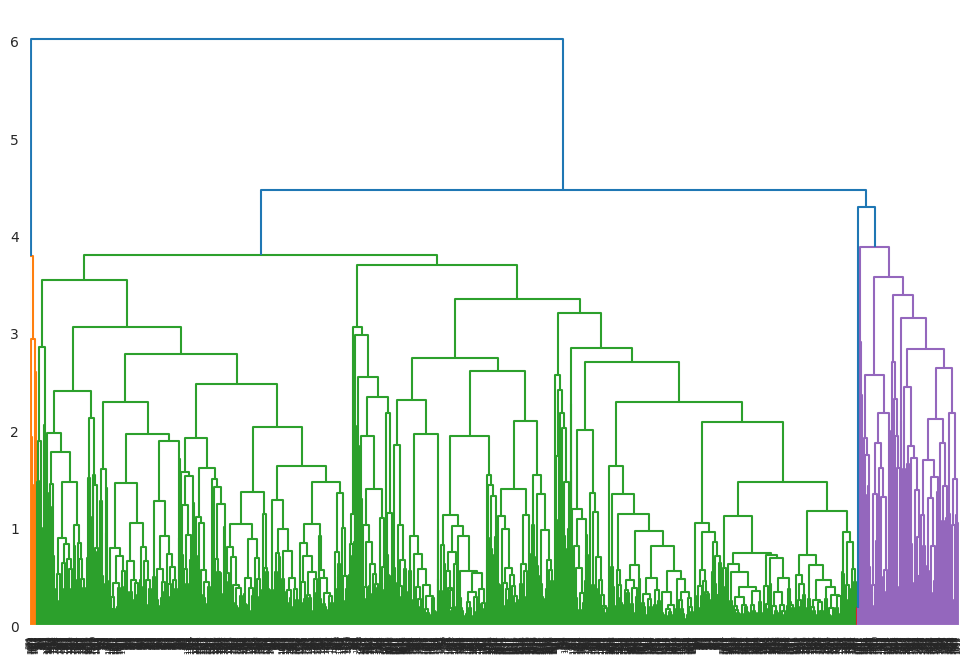

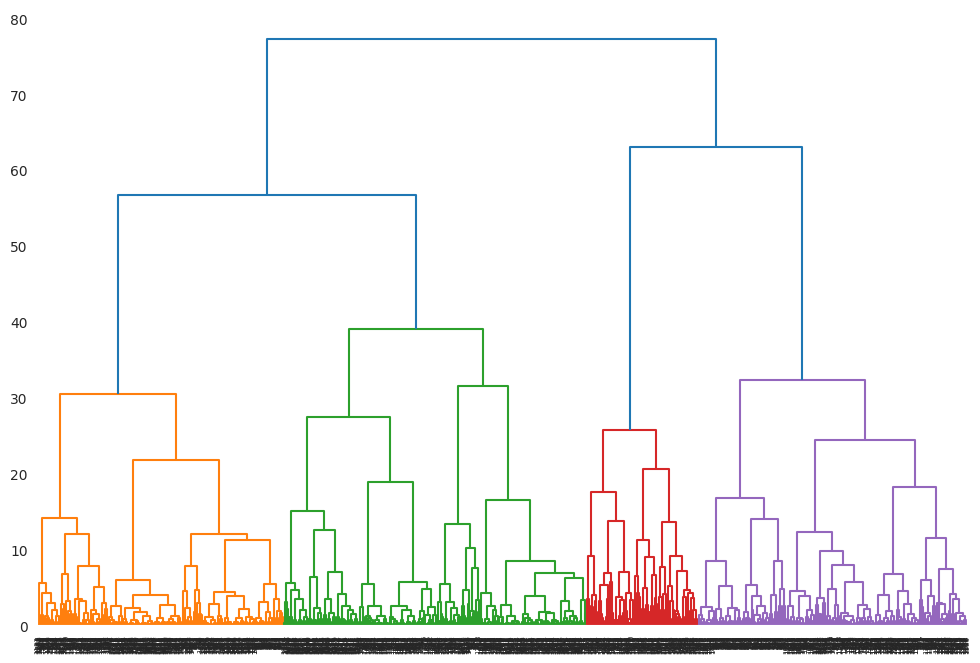

In [ ]:
# Draw dendogram for each linkage methods
linkage_methods = ['complete', 'average', 'ward']
for m in linkage_methods:
  z = sch.linkage(df_scaled, method=m)
  plt.figure(figsize=(12, 8))
  sch.dendrogram(z)

#### Agglomerative Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Text(0, 0.5, 'Bouldin Index')

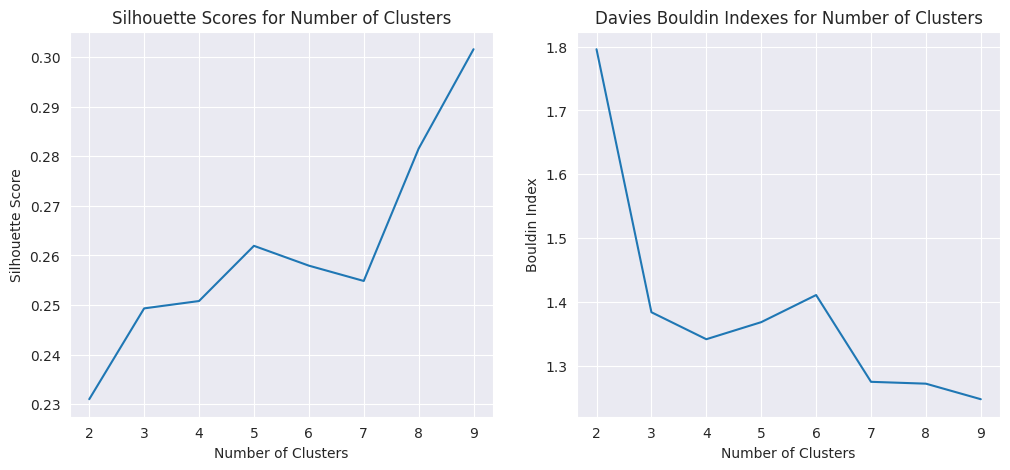

In [23]:
n_cluster_range = range(2, 10)
silhouette_scores = []
bouldin_indexes = []
for n_cluster in n_cluster_range:
  ac= AgglomerativeClustering(n_clusters = n_cluster, affinity="euclidean", linkage="ward")
  cluster_labels = ac.fit_predict(df_scaled)

  # Find silhoutte score
  ss = silhouette_score(df_scaled, cluster_labels)
  silhouette_scores.append(ss)

  # Find bouldin index
  bi = davies_bouldin_score(df_scaled, cluster_labels)
  bouldin_indexes.append(bi)

# Plot silhouette score and bouldin index
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (12, 5))

sns.lineplot(x= n_cluster_range, y= silhouette_scores, ax= axes[0])
axes[0].set_title("Silhouette Scores for Number of Clusters")
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Silhouette Score")

sns.lineplot(x= n_cluster_range, y= bouldin_indexes, ax= axes[1])
axes[1].set_title("Davies Bouldin Indexes for Number of Clusters")
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Bouldin Index")


### Observations

We choose 9 clusters as,

* Higher silhouette score indicate better-defined clusters.
* Lower value of davies-bouldin index indicate better clustering.

In [24]:
hc = AgglomerativeClustering(n_clusters= 9, metric="euclidean", linkage= "ward")
clusters = hc.fit_predict(df_scaled)

In [25]:
df1['cluster'] = clusters

In [26]:
df1

,sex,marital_status,age,education,income,occupation,settlement_size,cluster
0,0,0,67,2,124670,1,2,0
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,8
1996,1,1,27,1,117744,1,0,3
1997,0,0,31,0,86400,0,0,2
1998,1,1,24,1,97968,0,0,4


## Analyzing Characteristics of the identified clusters

In [27]:
# Add the cluster column to the categorical column list
# cat_columns.append("cluster")
sorted(df1["cluster"].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8]

#### Plot Categorical Features with each Cluster

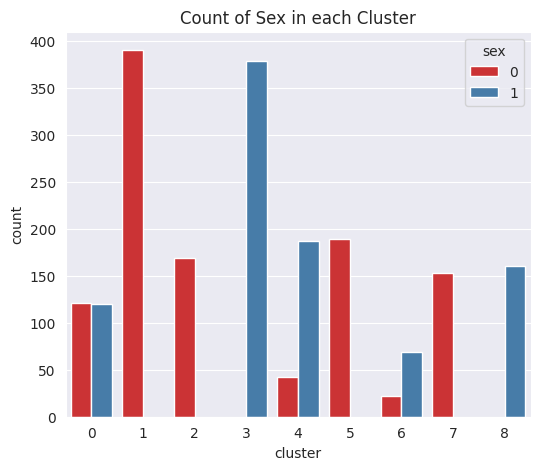

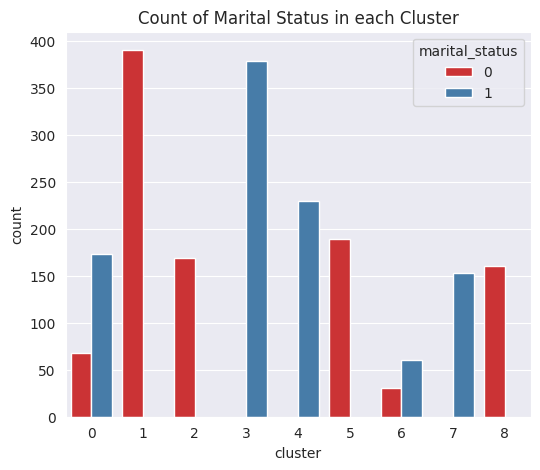

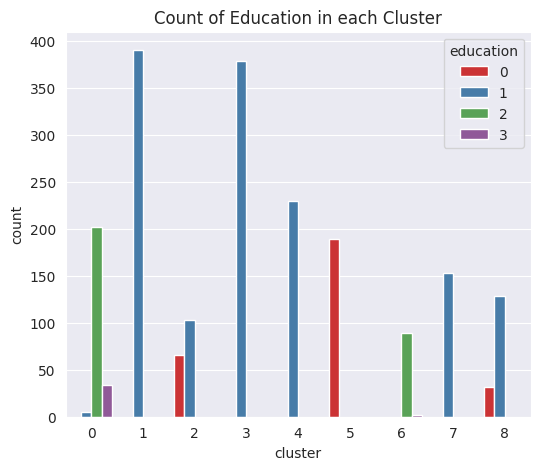

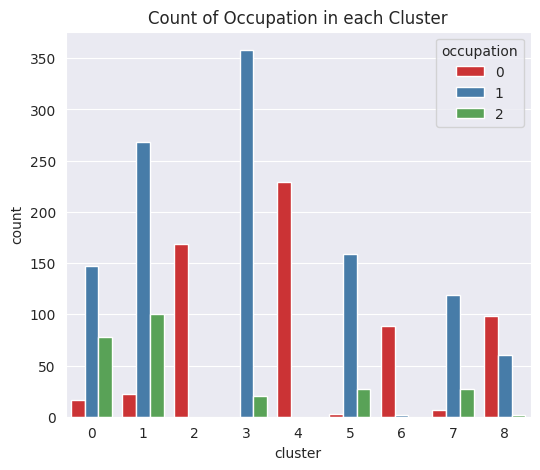

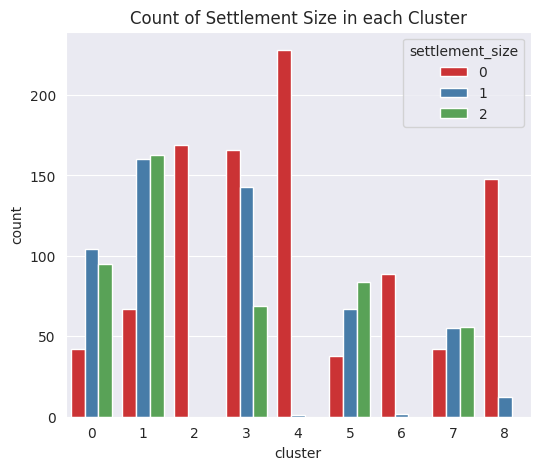

In [37]:
for col in cat_columns:
  fig, axes = plt.subplots(figsize=(6, 5))
  sns.countplot(data=df1, x="cluster", hue=col, order=sorted(df1["cluster"].unique()), hue_order=sorted(df1[col].unique()), palette="Set1")
  axes.set_title(f"Count of {col.replace('_', ' ').title()} in each Cluster")

#### Distribution of Numerical Features with each Cluster

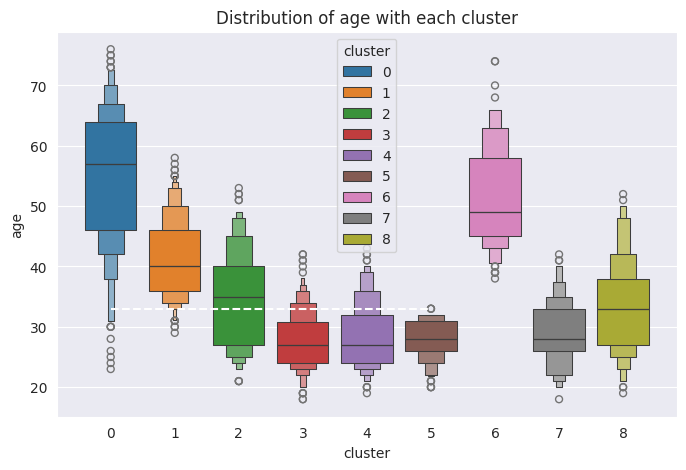

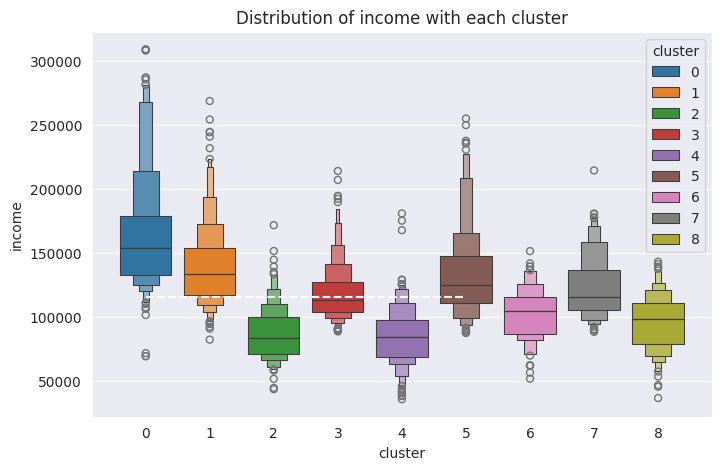

In [36]:
for col in num_columns:
  fig, axes = plt.subplots(figsize=(8,5))

  sns.boxenplot( data= df1, x= "cluster", y= col, order=sorted(df1["cluster"].unique()), hue="cluster", palette="tab10")
  plt.hlines(y= df1[col].median(), xmin= 0, xmax= 5, color= "w", linestyles="dashed")
  axes.set_title(f"Distribution of {col} with each cluster")

## Conclusions

**Cluster 0**

* Mixed in terms of sex.
* Mixed in terms of martial status, but leaning more towards non-single.
* Mostly for higher education level.
* Most visitors are for medium and higher occupation level.
* Mixed in terms of city size. Leaning towards medium and big cities.
* 45- 65 age group people mostly present.
* Highest income segment compared to other mall visitors.

**In Short: Higher educated, aged people of medium and big cities who are highly paid.**


**Cluster 1**

* Exclusively for men.
* Exclusively for single.
* Mostly for higher education level.
* Mixed in terms of occupation, but mostly from medium level.
* Mixed in terms of city size. Leaning towards medium and big cities.
* 35- 45 age group people mostly present.
* Slightly above average income compared to other mall visitors.

**In Short: Single middle aged men, average in other aspects.**



**Cluster 2**

* Exclusively for men.
* Exclusively for single.
* More visitors are in lower education level.
* Exclusively lowest tier occupation category (unskilled/unemployed)
* Exclusively small city.
* 25- 40 age group people mostly present.
* Lowest income segment compared to other mall visitors.

**In Short: Single young men of small cities, not so educated having lowest income of unemployed or unskilled.**




**Cluster 3**

* Exclusively for women.
* Exclusively for non-single.
* Exclusively for high school student.
* Almost exclusively medium tier occupation category
* Mixed in terms of city size. Leaning towards small and medium cities.
* Younger people mostly present in 25- 30 age group.
* Average income compared to other mall visitors.

**In Short: Non-Single young women, average in other aspects of small and medium cities.**


**Cluster 4**

* Mixed in terms of sex, but leaning towards women.
* Exclusively for non-single.
* Exclusively for high school student.
* Exclusively lowest tier occupation category (unskilled/unemployed)
* Exclusively small city.
* Younger people mostly present in 25- 30 age group.
* Lowest income segment compared to other mall visitors.

**In Short: Non-Single young people of small cities, low income, not so educated unemployed or unskilled.**


**Cluster 5**

* Exclusively for men.
* Exclusively for single.
* Exclusively for unknown education.
* Most visitors are for medium and higher occupation level.
* Mixed in terms of city size. Leaning towards medium and big cities.
* Youngest people present in 20- 30 age group.
* Slightly above average income compared to other mall visitors.

**In Short: Single young men, average in all aspects.**

**Cluster 6**

* Mixed in terms of sex, but leaning towards women.
* Mixed in terms of martial status, but leaning more towards non-single.
* Exclusively for high university student.
* Exclusively lowest tier occupation category (unskilled/unemployed).
* Exclusively small city.
* Slightly below average income compared to other mall visitors.

**In Short: Educated unskilled or unemployed people having low income from small cities.**

**Cluster 7**

* Exclusively for men.
* Exclusively for non-single.
* Exclusively for high school student.
* Most visitors are for medium and higher occupation level.
* Mixed in terms of city size.
* Slightly aged people above 40.
* Slightly above average income compared to other mall visitors.

**In Short: Non-Single middile aged men from different sized cities, above average income of middle or higher occupation level.**


**Cluster 8**

* Exclusively for women.
* Exclusively for single.
*Most visitors are high school background and few unknown education.
* Mixed in terms of occupation, but mostly from lowest level.
* Exclusively small city.
* 25- 40 age group people mostly present.
* Slightly below average income compared to other mall visitors.

**In Short: Single young women of small cities, low income low occupation not so educated.**

